# Ex 2 

In [1]:
#!/usr/bin/env python
# encoding: utf-8
"""
This is a mini demo of how to use numpy arrays and plot data.
NOTE: the operators + - * / are element wise operation. If you want
matrix multiplication use ``dot`` or ``mdot``!
"""
import numpy as np
from numpy import dot
from numpy import add
from numpy import subtract
from numpy.linalg import inv
from numpy import linalg as la
from functools import reduce
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D # 3D plotting
###############################################################################

In [2]:
# Helper functions
def mdot(*args):
    #"""Multi argument dot function. http://wiki.scipy.org/Cookbook/MultiDot"""
    return(reduce(np.dot, args))
def prepend_one(X):
    #"""prepend a one vector to X."""
    return np.column_stack([np.ones(X.shape[0]), X])
def grid2d(start, end, num=50):
    #"""Create an 2D array where each row is a 2D coordinate.
    #np.meshgrid is pretty annoying!
    #"""
    dom = np.linspace(start, end, num)
    X0, X1 = np.meshgrid(dom, dom)
    return np.column_stack([X0.flatten(), X1.flatten()])


# a)Linear Regression

data.shape: (100, 3)
X.shape: (100, 2)
y.shape: (100,)
X.shape: (100, 3)
Optimal beta: [-0.67806079  0.2451943   1.37054629]
X_grid.shape: (900, 3)
Y_grid.shape (900,)


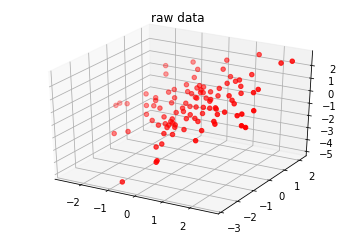

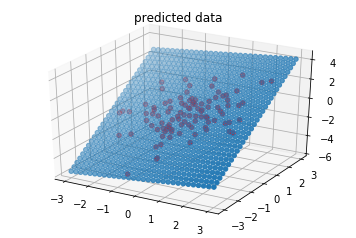

In [3]:
###############################################################################
# load the data
data = np.loadtxt("dataLinReg2D.txt")
print ("data.shape:", data.shape)
np.savetxt("tmp.txt", data) # save data if you want to
# split into features and labels
X, y = data[:, :2], data[:, 2]
print ("X.shape:", X.shape)
print ("y.shape:", y.shape)
# 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection arg is important!
ax.scatter(X[:, 0], X[:, 1], y, color="red")
ax.set_title("raw data")
plt.draw() # show, use plt.show() for blocking
# prep for linear reg.
X = prepend_one(X)
print ("X.shape:", X.shape)
# Fit model/compute optimal parameters beta
beta_ = mdot(inv(dot(X.T, X)), X.T, y)
print ("Optimal beta:", beta_)
# prep for prediction
X_grid = prepend_one(grid2d(-3, 3, num=30))
print ("X_grid.shape:", X_grid.shape)
# Predict with trained model
y_grid = mdot(X_grid, beta_)
print ("Y_grid.shape", y_grid.shape)
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection part is important
ax.scatter(X_grid[:, 1], X_grid[:, 2], y_grid) # don't use the 1 infront
ax.scatter(X[:, 1], X[:, 2], y, color="red") # also show the real data
ax.set_title("predicted data")
plt.show()

# Loss Function 

In [4]:
##############################################################
#Loss=dot(subtract(y,dot(X,beta_)).T,subtract(y,dot(X,beta_)))

Loss=la.norm(y-dot(X,beta_))
Loss

1.0123231427612496

# Ridge Regression with regularization Lamda

Optimal beta with regularalization: [-0.67738156  0.24556724  1.36149351]
X_grid.shape: (900, 3)
Y_grid.shape (900,)


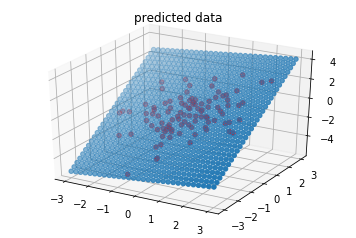

In [5]:
#Ridge regression with regularization

I =np.eye(X.shape[1])
I[0,0]=0
lamda_ = 0.5
beta_ridge = mdot(inv(add(dot(X.T, X),dot(lamda_,I))), X.T, y)

print ("Optimal beta with regularalization:", beta_ridge)
# prep for prediction
X_grid = prepend_one(grid2d(-3, 3, num=30))
print ("X_grid.shape:", X_grid.shape)
# Predict with trained model
y_grid = mdot(X_grid, beta_ridge)
print ("Y_grid.shape", y_grid.shape)
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection part is important
ax.scatter(X_grid[:, 1], X_grid[:, 2], y_grid) # don't use the 1 infront
ax.scatter(X[:, 1], X[:, 2], y, color="red") # also show the real data
ax.set_title("predicted data")
plt.show()

# Loss Function 

In [6]:
########################################################################
#Loss_ridge=dot(subtract(y,dot(X,beta_ridge)).T,subtract(y,dot(X,beta_ridge)))+(lamda_*dot(beta_ridge.T,beta_ridge))
Loss_ridge=la.norm(y-dot(X,beta_ridge))+(lamda_*dot(beta_ridge.T,beta_ridge))
Loss_ridge

2.2017466618601547

# b)Linear regression with quadratic features.

data.shape: (100, 3)
X.shape: (100, 2)
y.shape: (100,)


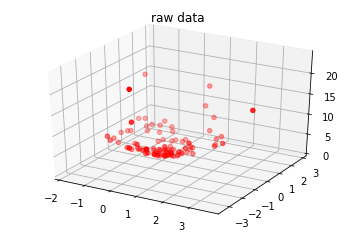

In [7]:
###############################################################################
# load the data
data = np.loadtxt("dataQuadReg2D.txt")
print ("data.shape:", data.shape)
np.savetxt("tmp.txt", data) # save data if you want to
# split into features and labels
X2, y2 = data[:, :2], data[:, 2]
print ("X.shape:", X2.shape)
print ("y.shape:", y2.shape)
# 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection arg is important!
ax.scatter(X2[:, 0], X2[:, 1], y2, color="red")
ax.set_title("raw data")
plt.show() # show, use plt.show() for blocking
# prep for linear reg.


X.shape: (100, 6)
Optimal beta: [ 1.26428783 -0.15318758 -0.27072946  1.08730116 -0.75215957  1.72877749]
X_grid.shape: (900, 6)
beta.shape: (6,)
Y_grid.shape (900,)


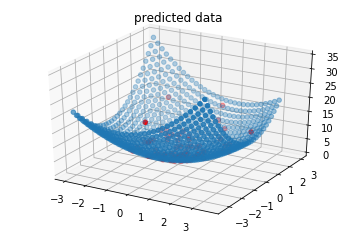

In [8]:
X2 = prepend_one(X2)
#X2 = X2**2
X2 = np.column_stack([ X2, data[:, 0]*data[:, 0], data[:, 0]*data[:, 1], data[:, 1]*data[:, 1]])
print ("X.shape:", X2.shape)
# Fit model/compute optimal parameters beta
beta_2 = mdot(inv(dot(X2.T, X2)), X2.T, y2)
print ("Optimal beta:", beta_2)
# prep for prediction
X2_grid = prepend_one(grid2d(-3, 3, num=30))
X2_grid = np.column_stack([X2_grid, X2_grid[:, 1]*X2_grid[:, 1], X2_grid[:, 1]*X2_grid[:, 2], X2_grid[:, 2]*X2_grid[:, 2]])
print ("X_grid.shape:", X2_grid.shape)
print ("beta.shape:", beta_2.shape)
# Predict with trained model
y2_grid = mdot(X2_grid, beta_2)
print ("Y_grid.shape", y2_grid.shape)
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection part is important
ax.scatter(X2_grid[:, 1], X2_grid[:, 2], y2_grid) # don't use the 1 infront
ax.scatter(X2[:, 1], X2[:, 2], y2, color="red") # also show the real data
ax.set_title("predicted data")
plt.show()

In [9]:
Loss_2=la.norm(y2-dot(X2,beta_2))
Loss_2

1.0900829597116219

Optimal beta with regularalization: [ 1.26925619 -0.15076414 -0.26983045  1.08478431 -0.74892508  1.72592784]
X_grid.shape: (900, 6)
Y_grid.shape (900,)


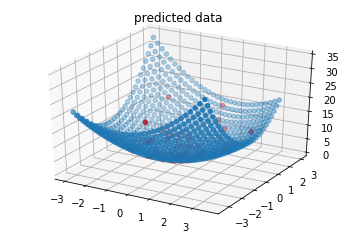

In [10]:
#Ridge regression with regularization

I =np.eye(X2.shape[1])
I[0,0]=0
lamda_ = 0.5
beta_ridge2 = mdot(inv(add(dot(X2.T, X2),dot(lamda_,I))), X2.T, y2)

print ("Optimal beta with regularalization:", beta_ridge2)
# prep for prediction
#X2_grid = prepend_one(grid2d(-3, 3, num=30))
#X2_grid = np.column_stack([X2_grid, X2_grid[:, 1]*X2_grid[:, 1], X2_grid[:, 1]*X2_grid[:, 2], X2_grid[:, 2]*X2_grid[:, 2]])
print ("X_grid.shape:", X2_grid.shape)
# Predict with trained model
y2_grid = mdot(X2_grid, beta_ridge2)
print ("Y_grid.shape", y2_grid.shape)
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection part is important
ax.scatter(X2_grid[:, 1], X2_grid[:, 2], y2_grid) # don't use the 1 infront
ax.scatter(X2[:, 1], X2[:, 2], y2, color="red") # also show the real data
ax.set_title("predicted data")
plt.show()

In [11]:
Loss_ridge2=la.norm(y2-dot(X2,beta_ridge2))+(lamda_*dot(beta_ridge2.T,beta_ridge2))
Loss_ridge2

4.3040404425272367

# c) k-cross validation

data.shape: (50, 3)
Minimum mean loss : 41.1257215679
Lamda with min mean loss : 32.033


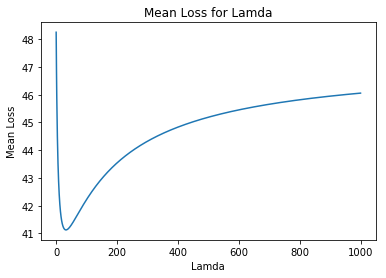

In [14]:
# load the data
data = np.loadtxt("dataQuadReg2D_noisy.txt")
print ("data.shape:", data.shape)
lmda = np.linspace(0.001, 1000, 1000)#np.array([0.01,1])#np.linspace(0.001, 1000, 1000)
mean_loss =np.empty(lmda.size) 
loss = np.empty(5)
k = 5 #number of splits
splits = np.array_split(data,k)
for l in range(lmda.size):
    #print("Lamda", lmda[l])
    loss.fill(0)
    #mean_loss[l]=0
    for i in range(k):
        data_without_i = np.empty([1,3],dtype=float) #initialize 
        for j in range(k): #data without i
            if j != i:
                data_without_i = np.append(data_without_i,splits[j], axis = 0)
        data_without_i = np.delete(data_without_i, 0, 0) #remove first element
        
        X, y = data_without_i[:, :2], data_without_i[:, 2]
        
        X = prepend_one(X)
        X = np.column_stack([X, data_without_i[:, 0]*data_without_i[:, 0], data_without_i[:, 0]*data_without_i[:, 1], data_without_i[:, 1]*data_without_i[:, 1]])

        I = np.identity(X.shape[1]) 
        I[0,0] = 0
        beta_ = mdot(inv(dot(X.T, X) + lmda[l]*I), X.T, y)
        

        X_test = splits[i][:, :2]  
        y_test = splits[i][:, 2]
       
        X_test = prepend_one(X_test)
        X_test = np.column_stack([X_test, X_test[:, 1]*X_test[:, 1], X_test[:, 1]*X_test[:, 2], X_test[:, 2]*X_test[:, 2]])
        #loss
        loss[i] = la.norm(y_test - dot(X_test, beta_)) * la.norm(y_test - dot(X_test, beta_))
        loss[i]=loss[i]/10
    mean_loss[l]=loss.mean()
    #print("lamda:",lmda[l])
    #print("Mean loss for lamda:",mean_loss[l])

    
print("Minimum mean loss :", mean_loss.min())
lmd_index=np.argmin(mean_loss)
print("Lamda with min mean loss :", lmda[lmd_index])
#mean_loss = mean_loss / mean_loss.max()
plt.plot(lmda, mean_loss)
plt.ylabel('Mean Loss')
plt.xlabel('Lamda')
plt.title('Mean Loss for Lamda')
plt.show()